# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе. 

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [3]:
data = pd.read_csv(
    "./data/data.csv", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [4]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [5]:
data = data.dropna(subset=['CustomerID'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [7]:
# Количество дубликатов
duplicates_count = data.duplicated().sum()
print(f"Количество дубликатов: {duplicates_count}")

# Показываем общую информацию о дубликатах
print(f"Общее количество строк: {len(data)}")
print(f"Количество уникальных строк: {len(data.drop_duplicates())}")

# Удаляем дубликаты
data = data.drop_duplicates()

# Проверяем результат
print(f"Количество строк после удаления дубликатов: {len(data)}")

Количество дубликатов: 5225
Общее количество строк: 406829
Количество уникальных строк: 401604
Количество строк после удаления дубликатов: 401604


#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [8]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [9]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов. 
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0): 
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled 
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']       
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled

data['QuantityCanceled'] = get_quantity_canceled(data)

In [10]:
nan_count = data['QuantityCanceled'].isna().sum()
print(f"Количество строк с NaN в QuantityCanceled: {nan_count}")

Количество строк с NaN в QuantityCanceled: 1303


In [ ]:
# Удалаяем NaN в QuantityCanceled
data = data.dropna(subset=['QuantityCanceled'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400301 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         400301 non-null  object        
 1   StockCode         400301 non-null  object        
 2   Description       400301 non-null  object        
 3   Quantity          400301 non-null  int64         
 4   InvoiceDate       400301 non-null  datetime64[ns]
 5   UnitPrice         400301 non-null  float64       
 6   CustomerID        400301 non-null  object        
 7   Country           400301 non-null  object        
 8   QuantityCanceled  400301 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.5+ MB


*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



In [13]:
# Удаляем трансакции с отрицательным количеством проданного товара
data.drop(data[data['Quantity'] < 0].index, inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         392732 non-null  object        
 1   StockCode         392732 non-null  object        
 2   Description       392732 non-null  object        
 3   Quantity          392732 non-null  int64         
 4   InvoiceDate       392732 non-null  datetime64[ns]
 5   UnitPrice         392732 non-null  float64       
 6   CustomerID        392732 non-null  object        
 7   Country           392732 non-null  object        
 8   QuantityCanceled  392732 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.0+ MB


#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [ ]:
import re

# Поиск строк, где StockCode начинается с латинских букв
mask = data['StockCode'].str.match(r'^[a-zA-Z]+', na=False)
special_transactions = data[mask]

# Уникальные комбинации StockCode и Description
unique_transactions = special_transactions[['StockCode', 'Description']].drop_duplicates()

# Сортировка по StockCode для удобства просмотра
unique_transactions = unique_transactions.sort_values('StockCode')

print(f"Найдено {len(unique_transactions)} уникальных специальных транзакций:")
print(unique_transactions.to_string(index=False))

# Удаляем специальные транзакции
special_transactions_mask = data['StockCode'].str.match(r'^[a-zA-Z]+', na=False)
data = data[~special_transactions_mask].copy()


Найдено 6 уникальных специальных транзакций:
   StockCode                Description
BANK CHARGES               Bank Charges
          C2                   CARRIAGE
         DOT             DOTCOM POSTAGE
           M                     Manual
        PADS PADS TO MATCH ALL CUSHIONS
        POST                    POSTAGE


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391183 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         391183 non-null  object        
 1   StockCode         391183 non-null  object        
 2   Description       391183 non-null  object        
 3   Quantity          391183 non-null  int64         
 4   InvoiceDate       391183 non-null  datetime64[ns]
 5   UnitPrice         391183 non-null  float64       
 6   CustomerID        391183 non-null  object        
 7   Country           391183 non-null  object        
 8   QuantityCanceled  391183 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 29.8+ MB


#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [ ]:
# Убираем строки, где UnitPrice равен нулю
filtered_data = data[data['UnitPrice'] != 0]

# Обновляем основной dataframe
data = filtered_data.copy()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391150 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         391150 non-null  object        
 1   StockCode         391150 non-null  object        
 2   Description       391150 non-null  object        
 3   Quantity          391150 non-null  int64         
 4   InvoiceDate       391150 non-null  datetime64[ns]
 5   UnitPrice         391150 non-null  float64       
 6   CustomerID        391150 non-null  object        
 7   Country           391150 non-null  object        
 8   QuantityCanceled  391150 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 29.8+ MB


#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:
 
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [19]:
# Вычисление общей цены заказа
data['TotalPrice'] = data['UnitPrice'] * (data['Quantity'] - data['QuantityCanceled'])

# Просмотр первых строк обновленного DataFrame
print(data.head())

  InvoiceNo StockCode                          Description  Quantity   
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  QuantityCanceled   
0 2010-12-01 08:26:00       2.55      17850  United Kingdom               0.0  \
1 2010-12-01 08:26:00       3.39      17850  United Kingdom               0.0   
2 2010-12-01 08:26:00       2.75      17850  United Kingdom               0.0   
3 2010-12-01 08:26:00       3.39      17850  United Kingdom               0.0   
4 2010-12-01 08:26:00       3.39      17850  United Kingdom               0.0   

   TotalPrice  
0       15.30  
1       20.34  
2       22.00  
3       20.34  


Помимо рекомендованных преобразований, вы также можете придумать собственные и применить их к исходным данным.
После завершения предобработки сохраните результат очищения данных в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391150 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         391150 non-null  object        
 1   StockCode         391150 non-null  object        
 2   Description       391150 non-null  object        
 3   Quantity          391150 non-null  int64         
 4   InvoiceDate       391150 non-null  datetime64[ns]
 5   UnitPrice         391150 non-null  float64       
 6   CustomerID        391150 non-null  object        
 7   Country           391150 non-null  object        
 8   QuantityCanceled  391150 non-null  float64       
 9   TotalPrice        391150 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 32.8+ MB


### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



In [ ]:
from datetime import datetime
warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Базовая информация о данных
print("Базовая статистика датафрейма:")
print(f"Период данных: с {data['InvoiceDate'].min()} по {data['InvoiceDate'].max()}")
print(f"Количество уникальных клиентов: {data['CustomerID'].nunique()}")
print(f"Количество уникальных стран: {data['Country'].nunique()}")
print(f"Количество уникальных товаров: {data['StockCode'].nunique()}")

Базовая статистика датафрейма:
Период данных: с 2010-12-01 08:26:00 по 2011-12-09 12:50:00
Количество уникальных клиентов: 4334
Количество уникальных стран: 37
Количество уникальных товаров: 3659



Топ-10 стран по общей выручке:
                Транзакций  Общая_выручка  Средняя_сумма_покупки   
Country                                                            
United Kingdom       16579     6797691.44                  19.48  \
Netherlands             93      283443.54                 122.07   
EIRE                   256      247074.57                  34.67   
Germany                443      201520.71                  23.32   
France                 379      181529.63                  22.64   
Australia               56      136950.25                 116.06   
Switzerland             47       51863.75                  28.65   
Spain                   88       51764.90                  21.42   
Belgium                 98       36673.04                  18.95   
Sweden                  34       36362.91                  85.16   

                Общее_количество_товаров  Уникальных_клиентов  
Country                                                        
United Kingdom         

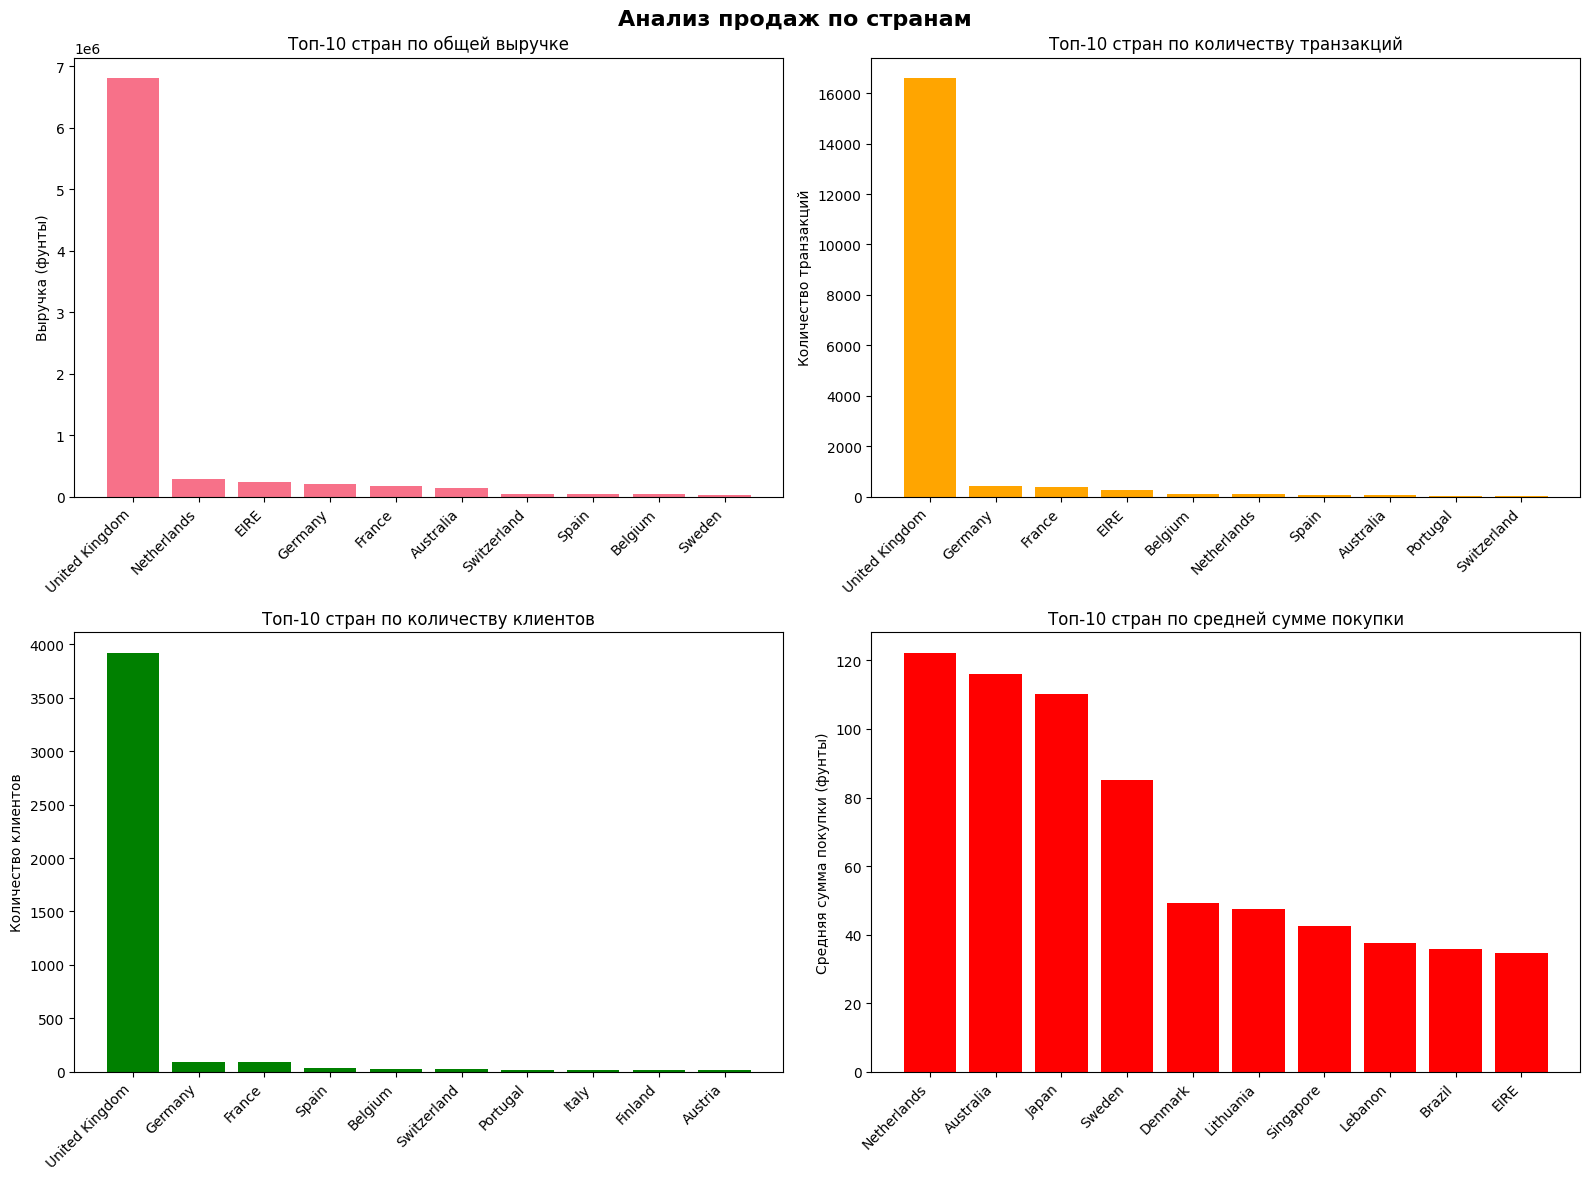

In [22]:
# Анализ по странам - количество транзакций и суммы покупок
country_analysis = data.groupby('Country').agg({
    'InvoiceNo': 'nunique',  # количество уникальных транзакций
    'TotalPrice': ['sum', 'mean'],  # общая сумма и средняя сумма покупки
    'Quantity': 'sum',  # общее количество товаров
    'CustomerID': 'nunique'  # количество уникальных клиентов
}).round(2)

country_analysis.columns = ['Транзакций', 'Общая_выручка', 'Средняя_сумма_покупки', 
                           'Общее_количество_товаров', 'Уникальных_клиентов']

# Сортировка по выручке
country_analysis_sorted = country_analysis.sort_values('Общая_выручка', ascending=False)
print("\nТоп-10 стран по общей выручке:")
print(country_analysis_sorted.head(10))

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Анализ продаж по странам', fontsize=16, fontweight='bold')

# Топ-10 стран по выручке
top_countries_revenue = country_analysis_sorted.head(10)
axes[0,0].bar(range(len(top_countries_revenue)), top_countries_revenue['Общая_выручка'])
axes[0,0].set_title('Топ-10 стран по общей выручке')
axes[0,0].set_xticks(range(len(top_countries_revenue)))
axes[0,0].set_xticklabels(top_countries_revenue.index, rotation=45, ha='right')
axes[0,0].set_ylabel('Выручка (фунты)')

# Топ-10 стран по количеству транзакций
top_countries_transactions = country_analysis.sort_values('Транзакций', ascending=False).head(10)
axes[0,1].bar(range(len(top_countries_transactions)), top_countries_transactions['Транзакций'], color='orange')
axes[0,1].set_title('Топ-10 стран по количеству транзакций')
axes[0,1].set_xticks(range(len(top_countries_transactions)))
axes[0,1].set_xticklabels(top_countries_transactions.index, rotation=45, ha='right')
axes[0,1].set_ylabel('Количество транзакций')

# Топ-10 стран по количеству клиентов
top_countries_customers = country_analysis.sort_values('Уникальных_клиентов', ascending=False).head(10)
axes[1,0].bar(range(len(top_countries_customers)), top_countries_customers['Уникальных_клиентов'], color='green')
axes[1,0].set_title('Топ-10 стран по количеству клиентов')
axes[1,0].set_xticks(range(len(top_countries_customers)))
axes[1,0].set_xticklabels(top_countries_customers.index, rotation=45, ha='right')
axes[1,0].set_ylabel('Количество клиентов')

# Средняя сумма покупки по странам
top_countries_avg = country_analysis.sort_values('Средняя_сумма_покупки', ascending=False).head(10)
axes[1,1].bar(range(len(top_countries_avg)), top_countries_avg['Средняя_сумма_покупки'], color='red')
axes[1,1].set_title('Топ-10 стран по средней сумме покупки')
axes[1,1].set_xticks(range(len(top_countries_avg)))
axes[1,1].set_xticklabels(top_countries_avg.index, rotation=45, ha='right')
axes[1,1].set_ylabel('Средняя сумма покупки (фунты)')

plt.tight_layout()
plt.show()


Сезонная выручка топ-10 стран:
Season               Весна        Зима        Лето       Осень
Country                                                       
United Kingdom  1385410.29  1470343.14  1424076.83  2517861.18
Netherlands       54035.93    69875.77    66680.92    92850.92
EIRE              40723.02    43497.25    71846.13    91008.17
Germany           46782.97    43311.57    43745.88    67680.29
France            33280.49    38670.01    35874.02    73705.11
Australia         31130.40    24124.33    52270.54    29424.98
Switzerland        6497.78     7491.32    15613.79    22260.86
Spain              9118.40    13244.28    12701.94    16700.28
Belgium            7216.86     5829.01     9162.71    14464.46
Sweden             7963.16     7648.12     8508.55    12243.08


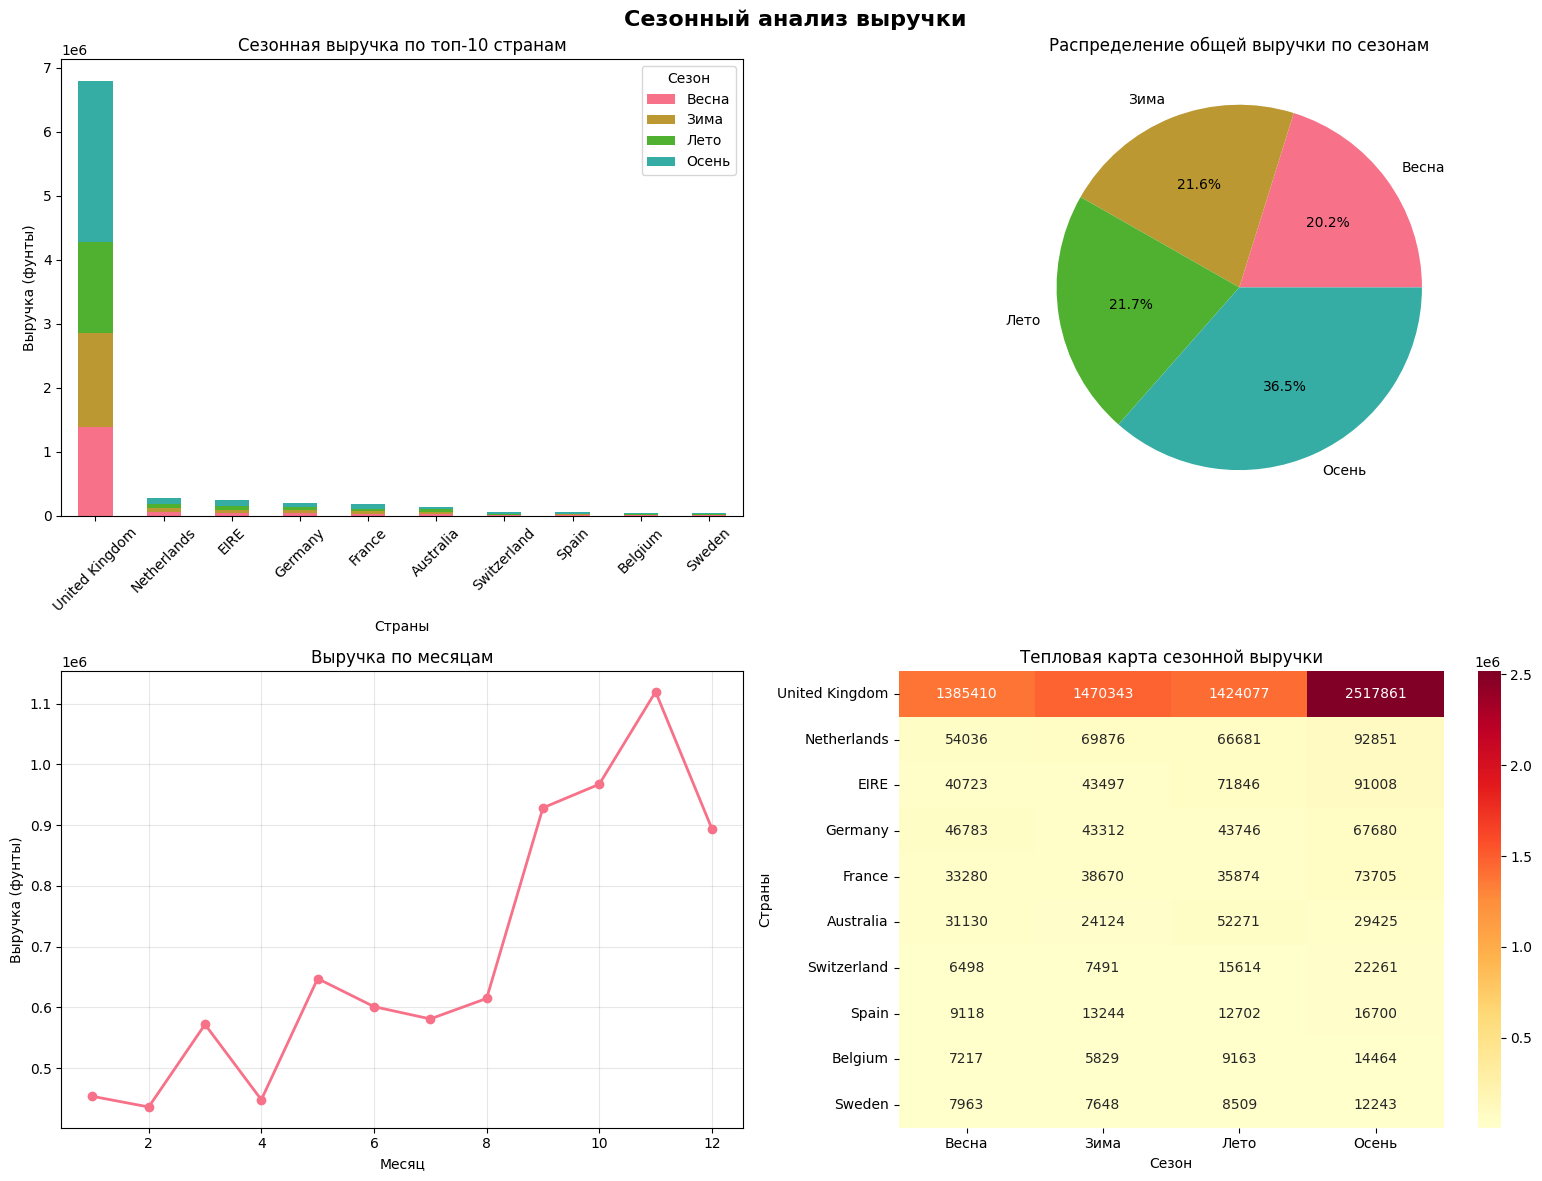

In [23]:
# Добавляем сезонную информацию
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Season'] = data['Month'].apply(lambda x: 
    'Зима' if x in [12, 1, 2] else
    'Весна' if x in [3, 4, 5] else
    'Лето' if x in [6, 7, 8] else 'Осень')

# Анализ сезонной выручки по странам
seasonal_revenue = data.groupby(['Country', 'Season'])['TotalPrice'].sum().reset_index()
seasonal_pivot = seasonal_revenue.pivot(index='Country', columns='Season', values='TotalPrice').fillna(0)

# Топ-10 стран по общей выручке для анализа сезонности
top_10_countries = country_analysis_sorted.head(10).index
seasonal_top = seasonal_pivot.loc[top_10_countries]

print("\nСезонная выручка топ-10 стран:")
print(seasonal_top.round(2))

# Визуализация сезонной выручки
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Сезонный анализ выручки', fontsize=16, fontweight='bold')

# Стэк-диаграмма сезонной выручки по странам
seasonal_top.plot(kind='bar', stacked=True, ax=axes[0,0])
axes[0,0].set_title('Сезонная выручка по топ-10 странам')
axes[0,0].set_xlabel('Страны')
axes[0,0].set_ylabel('Выручка (фунты)')
axes[0,0].legend(title='Сезон')
axes[0,0].tick_params(axis='x', rotation=45)

# Общая сезонная выручка
total_seasonal = data.groupby('Season')['TotalPrice'].sum()
axes[0,1].pie(total_seasonal.values, labels=total_seasonal.index, autopct='%1.1f%%')
axes[0,1].set_title('Распределение общей выручки по сезонам')

# Сезонная выручка по месяцам
monthly_revenue = data.groupby('Month')['TotalPrice'].sum()
axes[1,0].plot(monthly_revenue.index, monthly_revenue.values, marker='o', linewidth=2)
axes[1,0].set_title('Выручка по месяцам')
axes[1,0].set_xlabel('Месяц')
axes[1,0].set_ylabel('Выручка (фунты)')
axes[1,0].grid(True, alpha=0.3)

# Тепловая карта сезонной выручки топ-10 стран
sns.heatmap(seasonal_top, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[1,1])
axes[1,1].set_title('Тепловая карта сезонной выручки')
axes[1,1].set_xlabel('Сезон')
axes[1,1].set_ylabel('Страны')

plt.tight_layout()
plt.show()

Транзакции по сезонам:
  Season  InvoiceNo  TotalPrice  Quantity
0  Весна       3995  1667267.68   1010947
1   Зима       4145  1783730.63   1209416
2   Лето       3978  1796962.18   1126877
3  Осень       6284  3015632.50   1794544

Транзакции по месяцам:
    Month  InvoiceNo  TotalPrice  Quantity
0       1        983   453560.68    348178
1       2        992   436043.09    264785
2       3       1312   571941.01    347243
3       4       1139   447922.86    291116
4       5       1544   647403.81    372588
5       6       1390   601238.45    362725
6       7       1321   581019.35    367053
7       8       1267   614704.38    397099
8       9       1739   928554.44    542825
9      10       1903   967436.46    590174
10     11       2642  1119641.60    661545
11     12       2170   894126.86    596453


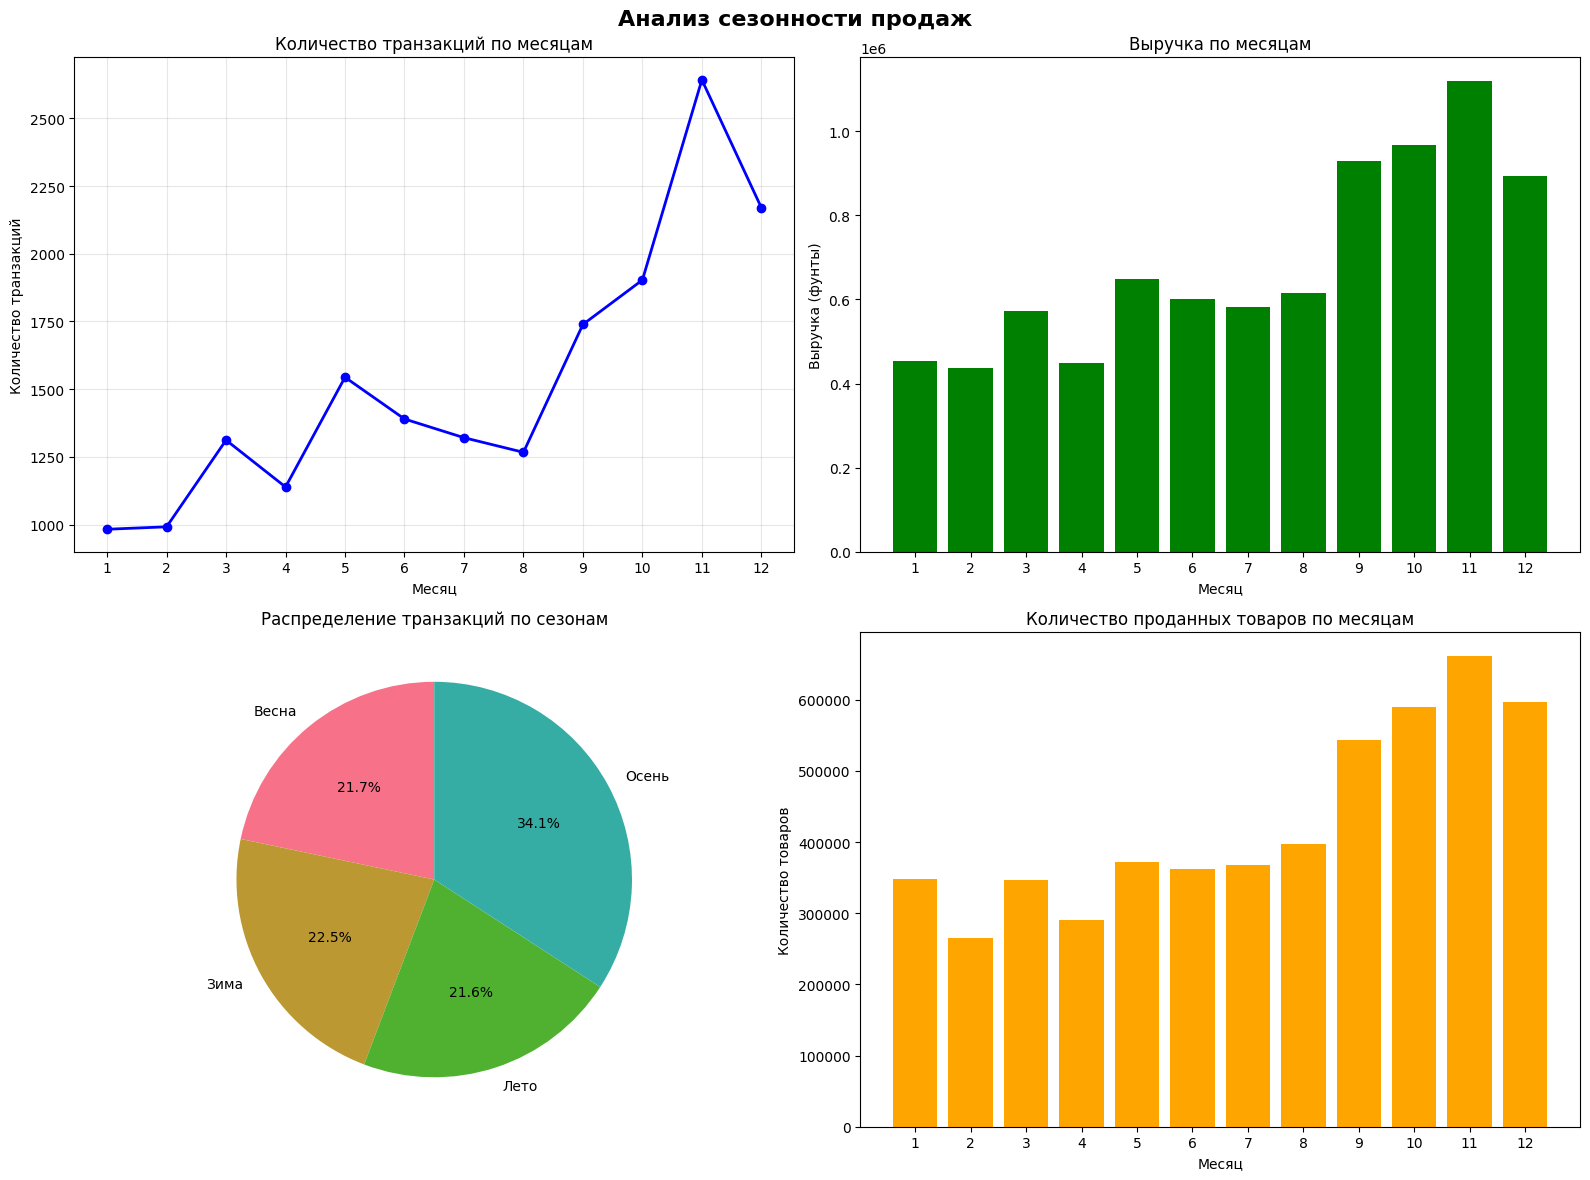

In [24]:
# Анализ количества транзакций по месяцам и сезонам
monthly_transactions = data.groupby('Month').agg({
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum',
    'Quantity': 'sum'
}).reset_index()

seasonal_transactions = data.groupby('Season').agg({
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum',
    'Quantity': 'sum'
}).reset_index()

print("Транзакции по сезонам:")
print(seasonal_transactions)

print("\nТранзакции по месяцам:")
print(monthly_transactions)

# Визуализация сезонности
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Анализ сезонности продаж', fontsize=16, fontweight='bold')

# Количество транзакций по месяцам
axes[0,0].plot(monthly_transactions['Month'], monthly_transactions['InvoiceNo'], 
               marker='o', linewidth=2, color='blue')
axes[0,0].set_title('Количество транзакций по месяцам')
axes[0,0].set_xlabel('Месяц')
axes[0,0].set_ylabel('Количество транзакций')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_xticks(range(1, 13))

# Выручка по месяцам
axes[0,1].bar(monthly_transactions['Month'], monthly_transactions['TotalPrice'], color='green')
axes[0,1].set_title('Выручка по месяцам')
axes[0,1].set_xlabel('Месяц')
axes[0,1].set_ylabel('Выручка (фунты)')
axes[0,1].set_xticks(range(1, 13))

# Сезонное распределение транзакций
axes[1,0].pie(seasonal_transactions['InvoiceNo'], labels=seasonal_transactions['Season'], 
              autopct='%1.1f%%', startangle=90)
axes[1,0].set_title('Распределение транзакций по сезонам')

# Количество проданных товаров по месяцам
axes[1,1].bar(monthly_transactions['Month'], monthly_transactions['Quantity'], color='orange')
axes[1,1].set_title('Количество проданных товаров по месяцам')
axes[1,1].set_xlabel('Месяц')
axes[1,1].set_ylabel('Количество товаров')
axes[1,1].set_xticks(range(1, 13))

plt.tight_layout()
plt.show()

In [25]:
# Добавляем информацию о дате и часе
data['Date'] = data['InvoiceDate'].dt.date
data['Hour'] = data['InvoiceDate'].dt.hour

# Группировка по датам и часам
daily_hourly_orders = data.groupby(['Date', 'Hour'])['InvoiceNo'].nunique().reset_index()
daily_hourly_orders.columns = ['Date', 'Hour', 'Orders_count']

print("Пример данных по дням и часам:")
print(daily_hourly_orders.head(10))

# Среднее количество заказов по часам
average_hourly_orders = daily_hourly_orders.groupby('Hour')['Orders_count'].mean().reset_index()
average_hourly_orders.columns = ['Hour', 'Average_orders']

print("\nСреднее количество ежедневно поступающих заказов по часам:")
print(average_hourly_orders.round(2))

Пример данных по дням и часам:
         Date  Hour  Orders_count
0  2010-12-01     8             6
1  2010-12-01     9            16
2  2010-12-01    10            11
3  2010-12-01    11            12
4  2010-12-01    12            22
5  2010-12-01    13            12
6  2010-12-01    14             8
7  2010-12-01    15            14
8  2010-12-01    16            16
9  2010-12-01    17             4

Среднее количество ежедневно поступающих заказов по часам:
    Hour  Average_orders
0      6            1.00
1      7            1.26
2      8            2.72
3      9            5.49
4     10            7.27
5     11            7.44
6     12           10.22
7     13            8.69
8     14            7.48
9     15            6.71
10    16            4.12
11    17            2.95
12    18            3.60
13    19            2.92
14    20            1.29


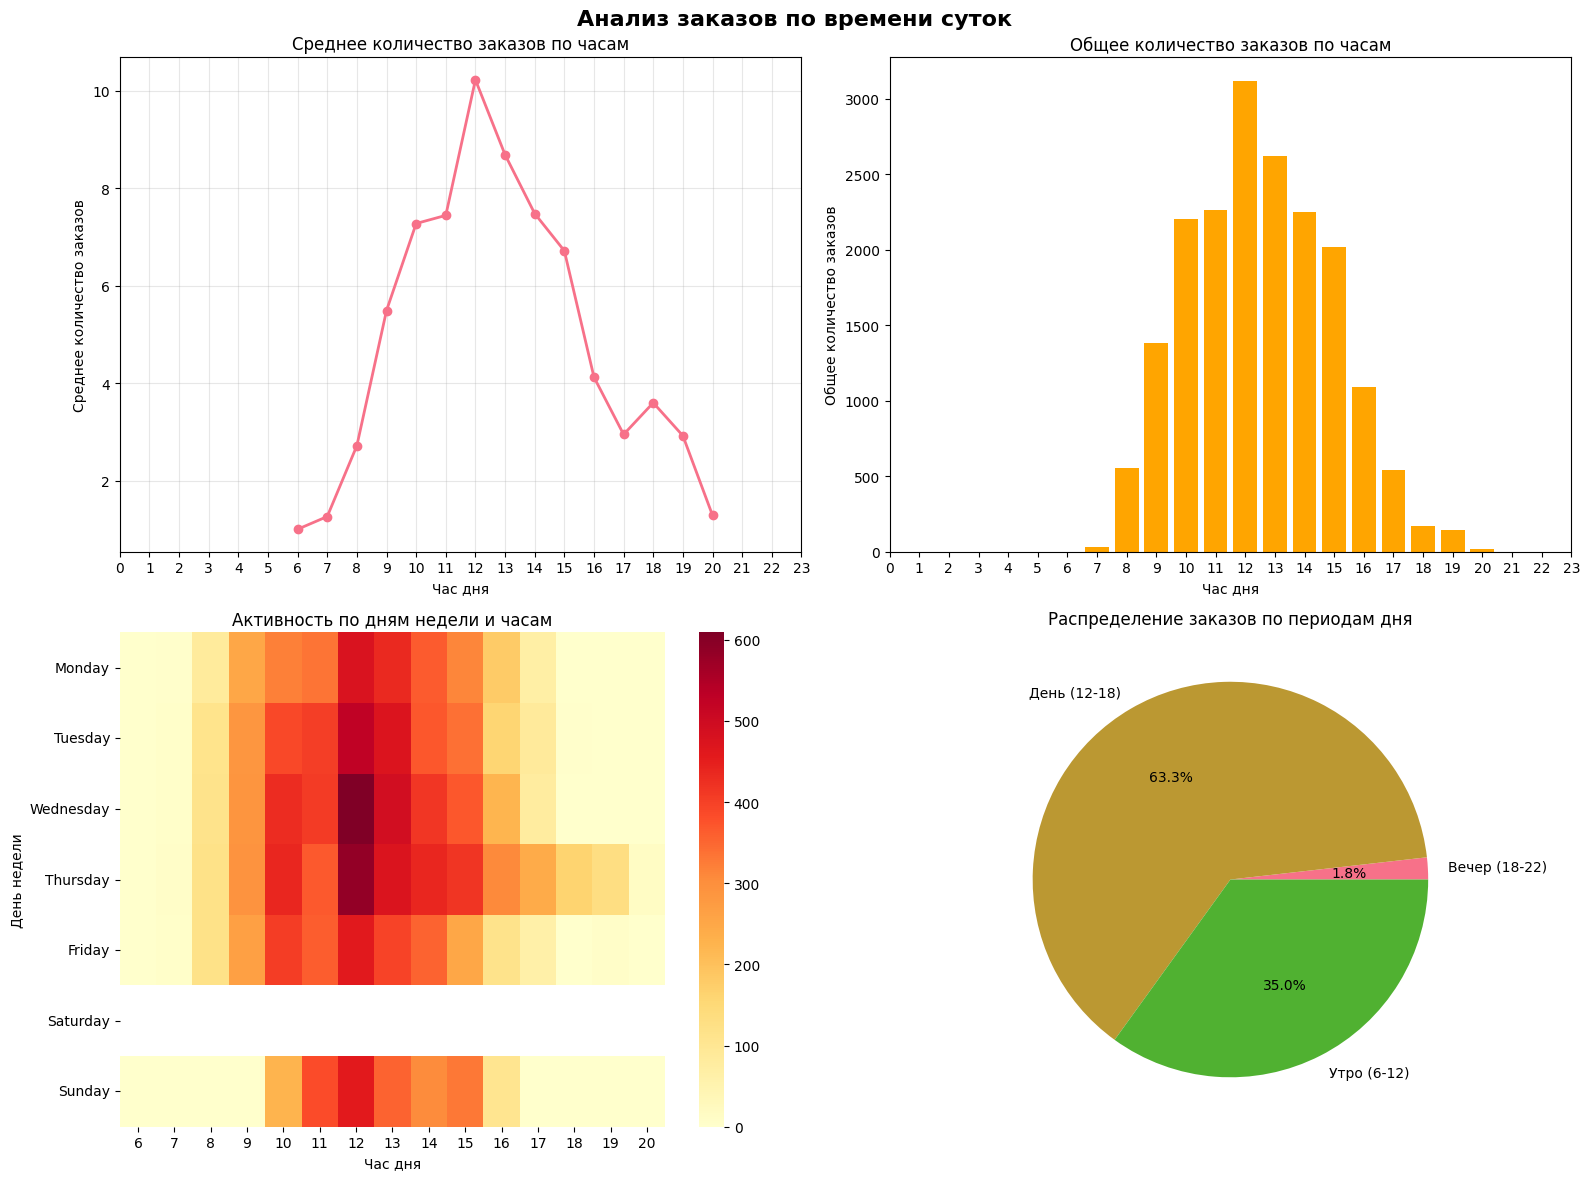


Статистика по периодам дня:
               Количество_заказов  Общая_выручка  Средняя_сумма_заказа   
Time_period                                                              
Вечер (18-22)                 330      163381.68                 23.71  \
День (12-18)                11640     4946933.44                 18.48   
Утро (6-12)                  6433     3153277.87                 27.05   

               Общее_количество_товаров  
Time_period                              
Вечер (18-22)                     96871  
День (12-18)                    2971906  
Утро (6-12)                     2073007  


In [26]:
# Визуализация распределения заказов по времени суток
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Анализ заказов по времени суток', fontsize=16, fontweight='bold')

# Среднее количество заказов по часам
axes[0,0].plot(average_hourly_orders['Hour'], average_hourly_orders['Average_orders'], 
               marker='o', linewidth=2, markersize=6)
axes[0,0].set_title('Среднее количество заказов по часам')
axes[0,0].set_xlabel('Час дня')
axes[0,0].set_ylabel('Среднее количество заказов')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_xticks(range(0, 24))

# Общее количество заказов по часам
total_hourly_orders = data.groupby('Hour')['InvoiceNo'].nunique()
axes[0,1].bar(total_hourly_orders.index, total_hourly_orders.values, color='orange')
axes[0,1].set_title('Общее количество заказов по часам')
axes[0,1].set_xlabel('Час дня')
axes[0,1].set_ylabel('Общее количество заказов')
axes[0,1].set_xticks(range(0, 24))

# Тепловая карта активности по дням недели и часам
data['Weekday'] = data['InvoiceDate'].dt.day_name()
weekday_hour_activity = data.groupby(['Weekday', 'Hour'])['InvoiceNo'].nunique().unstack(fill_value=0)

# Упорядочиваем дни недели
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_hour_activity = weekday_hour_activity.reindex(weekday_order)

sns.heatmap(weekday_hour_activity, annot=False, cmap='YlOrRd', ax=axes[1,0])
axes[1,0].set_title('Активность по дням недели и часам')
axes[1,0].set_xlabel('Час дня')
axes[1,0].set_ylabel('День недели')

# Категоризация времени суток
def categorize_hour(hour):
    if 6 <= hour < 12:
        return 'Утро (6-12)'
    elif 12 <= hour < 18:
        return 'День (12-18)'
    elif 18 <= hour < 22:
        return 'Вечер (18-22)'
    else:
        return 'Ночь (22-6)'

data['Time_period'] = data['Hour'].apply(categorize_hour)
time_period_orders = data.groupby('Time_period')['InvoiceNo'].nunique()

axes[1,1].pie(time_period_orders.values, labels=time_period_orders.index, autopct='%1.1f%%')
axes[1,1].set_title('Распределение заказов по периодам дня')

plt.tight_layout()
plt.show()

# Статистика по периодам дня
print("\nСтатистика по периодам дня:")
time_period_stats = data.groupby('Time_period').agg({
    'InvoiceNo': 'nunique',
    'TotalPrice': ['sum', 'mean'],
    'Quantity': 'sum'
}).round(2)
time_period_stats.columns = ['Количество_заказов', 'Общая_выручка', 'Средняя_сумма_заказа', 'Общее_количество_товаров']
print(time_period_stats)

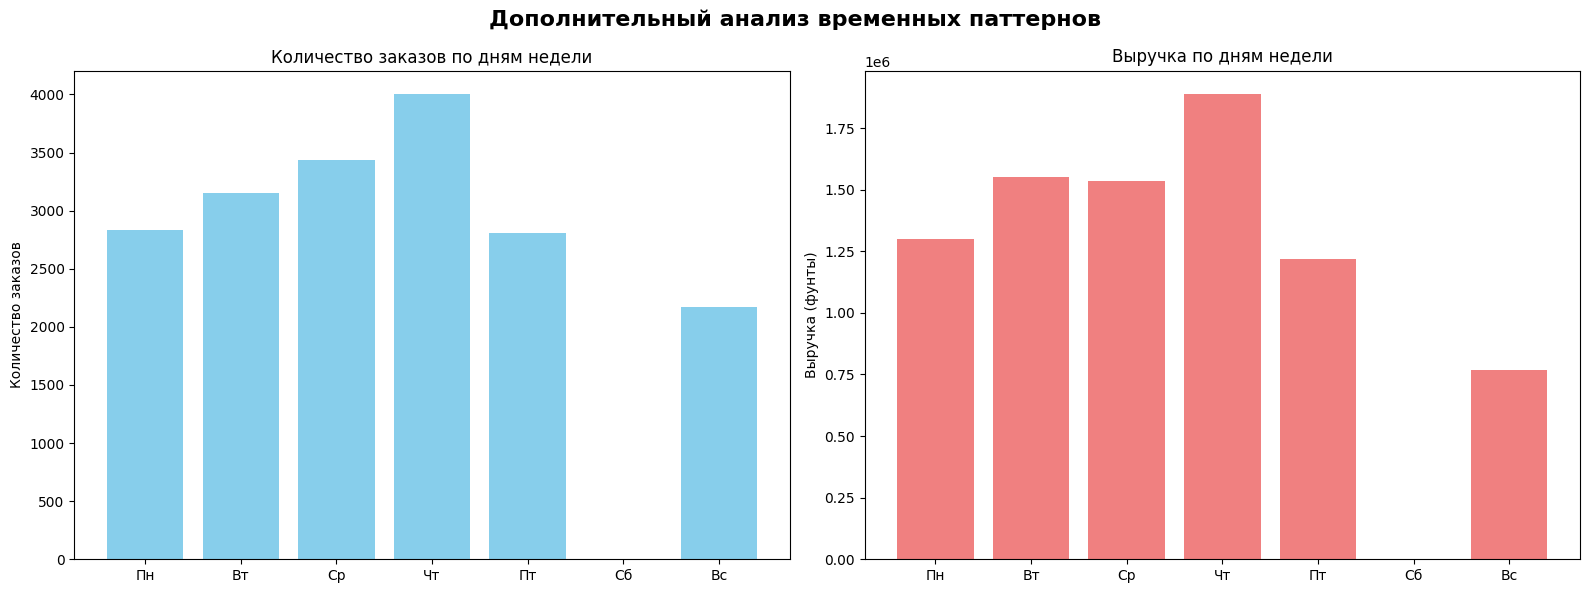

Статистика по дням недели:
           InvoiceNo  TotalPrice
Weekday                         
Monday        2830.0  1300385.00
Tuesday       3156.0  1552138.73
Wednesday     3436.0  1535711.83
Thursday      4003.0  1888101.69
Friday        2809.0  1219558.24
Saturday         NaN         NaN
Sunday        2168.0   767697.50


In [27]:
# Анализ трендов по дням недели
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Дополнительный анализ временных паттернов', fontsize=16, fontweight='bold')

# Активность по дням недели
weekday_stats = data.groupby('Weekday').agg({
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reindex(weekday_order)

axes[0].bar(range(len(weekday_stats)), weekday_stats['InvoiceNo'], color='skyblue')
axes[0].set_title('Количество заказов по дням недели')
axes[0].set_xticks(range(len(weekday_stats)))
axes[0].set_xticklabels(['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
axes[0].set_ylabel('Количество заказов')

# Выручка по дням недели
axes[1].bar(range(len(weekday_stats)), weekday_stats['TotalPrice'], color='lightcoral')
axes[1].set_title('Выручка по дням недели')
axes[1].set_xticks(range(len(weekday_stats)))
axes[1].set_xticklabels(['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
axes[1].set_ylabel('Выручка (фунты)')

plt.tight_layout()
plt.show()

print("Статистика по дням недели:")
print(weekday_stats)

In [28]:
print("\n" + "="*50)
print("ОСНОВНЫЕ ВЫВОДЫ ПО АНАЛИЗУ:")
print("="*50)

print(f"""
1. СТРАНЫ-ЛИДЕРЫ:
   - По выручке: {country_analysis_sorted.index[0]} (доминирует с большим отрывом)
   - По количеству транзакций: {country_analysis.sort_values('Транзакций', ascending=False).index[0]}
   - По количеству клиентов: {country_analysis.sort_values('Уникальных_клиентов', ascending=False).index[0]}

2. СЕЗОННОСТЬ:
   - Пиковый сезон: {total_seasonal.idxmax()} ({total_seasonal.max():,.0f} фунтов)
   - Самый слабый сезон: {total_seasonal.idxmin()} ({total_seasonal.min():,.0f} фунтов)
   - Пиковый месяц: {monthly_revenue.idxmax()} ({monthly_revenue.max():,.0f} фунтов)

3. ВРЕМЕННЫЕ ПАТТЕРНЫ:
   - Пиковый час активности: {total_hourly_orders.idxmax()}:00 ({total_hourly_orders.max()} заказов)
   - Самый активный период дня: {time_period_orders.idxmax()}
   - Средние заказы в час варьируются от {average_hourly_orders['Average_orders'].min():.1f} до {average_hourly_orders['Average_orders'].max():.1f}
""")


ОСНОВНЫЕ ВЫВОДЫ ПО АНАЛИЗУ:

1. СТРАНЫ-ЛИДЕРЫ:
   - По выручке: United Kingdom (доминирует с большим отрывом)
   - По количеству транзакций: United Kingdom
   - По количеству клиентов: United Kingdom

2. СЕЗОННОСТЬ:
   - Пиковый сезон: Осень (3,015,632 фунтов)
   - Самый слабый сезон: Весна (1,667,268 фунтов)
   - Пиковый месяц: 11 (1,119,642 фунтов)

3. ВРЕМЕННЫЕ ПАТТЕРНЫ:
   - Пиковый час активности: 12:00 (3118 заказов)
   - Самый активный период дня: День (12-18)
   - Средние заказы в час варьируются от 1.0 до 10.2



In [ ]:
# Список признаков, которые нужно удалить
columns_to_drop = ['Year', 'Month', 'Season', 'Date', 'Hour', 'Weekday', 'Time_period']

# Удаление признаков
data.drop(columns=columns_to_drop, inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391150 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         391150 non-null  object        
 1   StockCode         391150 non-null  object        
 2   Description       391150 non-null  object        
 3   Quantity          391150 non-null  int64         
 4   InvoiceDate       391150 non-null  datetime64[ns]
 5   UnitPrice         391150 non-null  float64       
 6   CustomerID        391150 non-null  object        
 7   Country           391150 non-null  object        
 8   QuantityCanceled  391150 non-null  float64       
 9   TotalPrice        391150 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 32.8+ MB


### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. 

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [31]:
# Дата точки отсчета
cutoff_date = pd.to_datetime('2011-12-10')

# Преобразование InvoiceDate в datetime (если ещё не сделано)
if not isinstance(data['InvoiceDate'].dtype, pd.DatetimeTZDtype):
    data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Расчет Recency
recency = (
    data.groupby('CustomerID')['InvoiceDate']
    .max()
    .apply(lambda x: (cutoff_date - x).days)
)

# Расчет Frequency
frequency = data.groupby('CustomerID')['InvoiceNo'].nunique()

# Расчет Monetary
monetary_value = data.groupby('CustomerID')['TotalPrice'].sum()

# Объединение результатов
rfm_data = pd.concat([recency, frequency, monetary_value], axis=1)
rfm_data.columns = ['Recency', 'Frequency', 'MonetaryValue']

# Добавление полученных значений обратно в основной DataFrame
data = data.merge(rfm_data, left_on='CustomerID', right_index=True, how='left')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391150 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         391150 non-null  object        
 1   StockCode         391150 non-null  object        
 2   Description       391150 non-null  object        
 3   Quantity          391150 non-null  int64         
 4   InvoiceDate       391150 non-null  datetime64[ns]
 5   UnitPrice         391150 non-null  float64       
 6   CustomerID        391150 non-null  object        
 7   Country           391150 non-null  object        
 8   QuantityCanceled  391150 non-null  float64       
 9   TotalPrice        391150 non-null  float64       
 10  Recency           391150 non-null  int64         
 11  Frequency         391150 non-null  int64         
 12  MonetaryValue     391150 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usa

После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

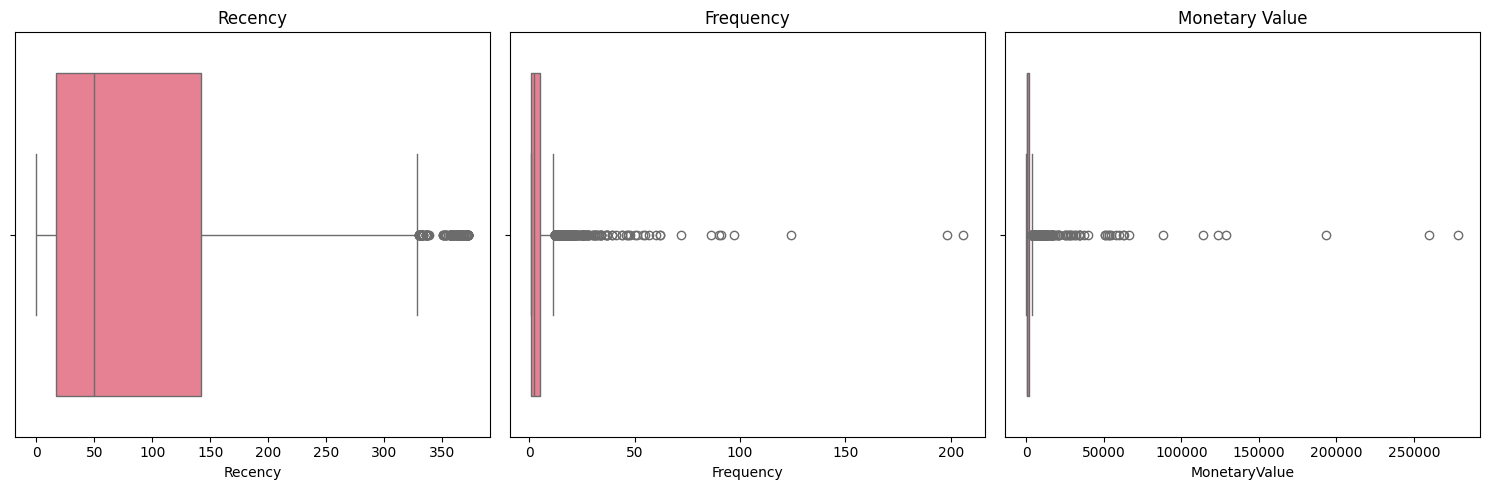

In [33]:
# Настройка размера окна для лучшего отображения
plt.figure(figsize=(15, 5))

# Box-plot для Recency
plt.subplot(1, 3, 1)
sns.boxplot(x="Recency", data=rfm_data)
plt.title("Recency")

# Box-plot для Frequency
plt.subplot(1, 3, 2)
sns.boxplot(x="Frequency", data=rfm_data)
plt.title("Frequency")

# Box-plot для Monetary
plt.subplot(1, 3, 3)
sns.boxplot(x="MonetaryValue", data=rfm_data)
plt.title("Monetary Value")

# Отображение всего сразу
plt.tight_layout()  # Чтобы избежать наложения подписей друг на друга
plt.show()

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [34]:
# Определение порогов на основе 95-го перцентиля
freq_threshold = rfm_data['Frequency'].quantile(0.95)
monet_threshold = rfm_data['MonetaryValue'].quantile(0.95)

print(f'Частота покупок больше {freq_threshold:.2f}')
print(f'Сумма расходов больше {monet_threshold:.2f}')

# Фильтрация: оставляем только записи, удовлетворяющие условию
data = rfm_data[
    (~((rfm_data['Frequency'] > freq_threshold) | (rfm_data['MonetaryValue'] > monet_threshold)))
]

# Проверяем количество оставшихся строк
print(f'Количество клиентов после фильтрации: {len(data)}')

Частота покупок больше 13.00
Сумма расходов больше 5659.85
Количество клиентов после фильтрации: 4044


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4044 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        4044 non-null   int64  
 1   Frequency      4044 non-null   int64  
 2   MonetaryValue  4044 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 126.4+ KB


## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга). 

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


Исходные данные:
            Recency  Frequency  MonetaryValue
CustomerID                                   
12346           325          1           0.00
12347             2          7        4310.00
12348            75          4        1437.24
12349            18          1        1457.55
12350           310          1         294.40
Форма данных: (4044, 3)

Форма данных после предобработки: (4044, 2)
Объясненная дисперсия PCA компонент: [0.67747053 0.24012744]
Суммарная объясненная дисперсия: 0.9175979671688048

Оценка алгоритма: kmeans
Лучшее количество кластеров: 3
Лучший коэффициент силуэта: 0.5242

Оценка алгоритма: agglomerative
Лучшее количество кластеров: 2
Лучший коэффициент силуэта: 0.5234

Оценка алгоритма: gaussian_mixture
Лучшее количество кластеров: 3
Лучший коэффициент силуэта: 0.4361


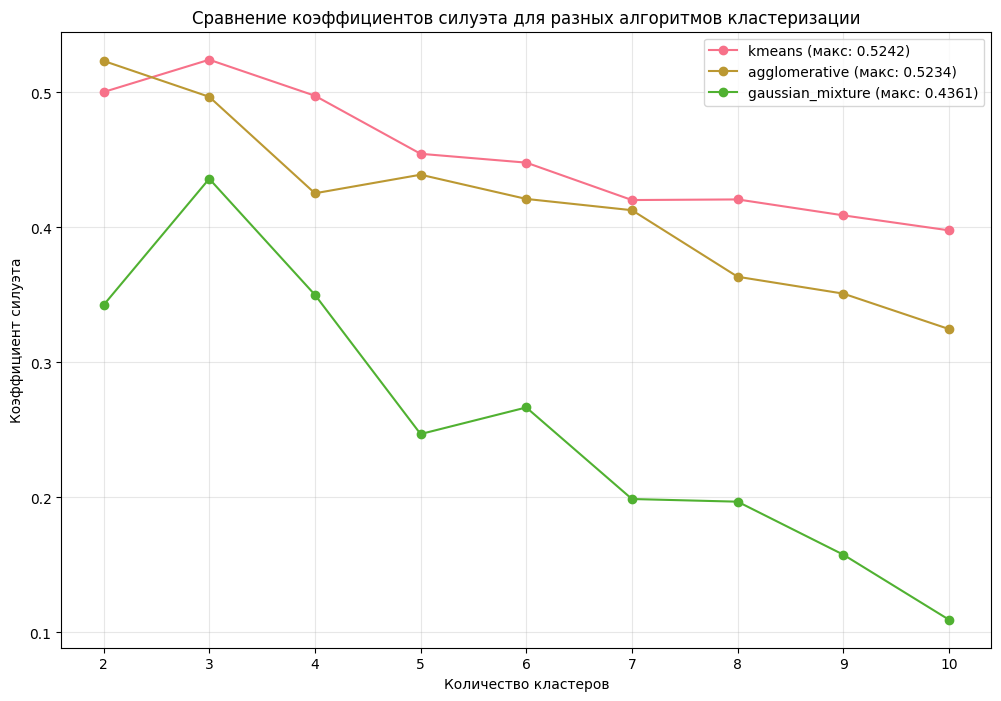


Лучший алгоритм: kmeans
Оптимальное количество кластеров: 3
Лучший коэффициент силуэта: 0.5242


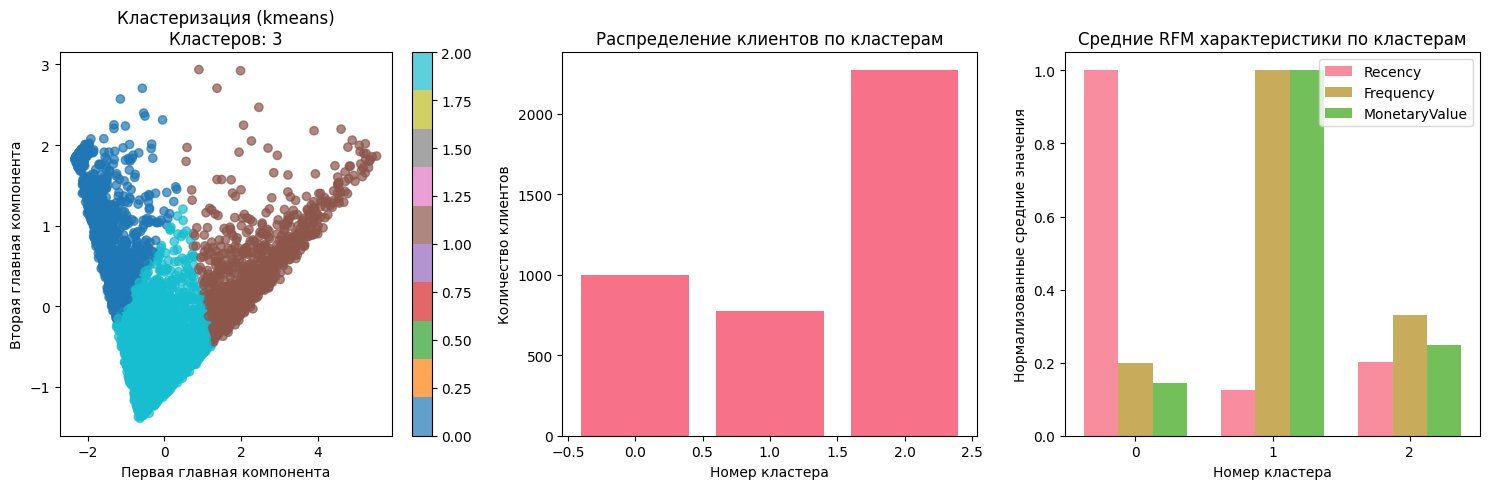


Статистика по кластерам:

Кластер 0 (n=999):
  Recency: 253.5 ± 64.5
  Frequency: 1.4 ± 0.8
  MonetaryValue: 386.3 ± 369.2

Кластер 1 (n=776):
  Recency: 31.9 ± 38.2
  Frequency: 7.1 ± 2.6
  MonetaryValue: 2657.7 ± 1041.4

Кластер 2 (n=2269):
  Recency: 51.2 ± 39.9
  Frequency: 2.3 ± 1.3
  MonetaryValue: 660.1 ± 467.4

Финальные метки кластеров добавлены к данным.
Форма итогового датафрейма: (4044, 6)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings('ignore')

print("Исходные данные:")
print(data.head())
print(f"Форма данных: {data.shape}")

# Создание pipeline для предобработки данных
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

# Применение предобработки к данным
data_preprocessed = preprocessing_pipeline.fit_transform(data)

# Создание DataFrame с предобработанными данными
data_pca = pd.DataFrame(data_preprocessed, 
                       columns=['PC1', 'PC2'], 
                       index=data.index)

print("\nФорма данных после предобработки:", data_pca.shape)
print("Объясненная дисперсия PCA компонент:", 
      preprocessing_pipeline.named_steps['pca'].explained_variance_ratio_)
print("Суммарная объясненная дисперсия:", 
      sum(preprocessing_pipeline.named_steps['pca'].explained_variance_ratio_))

# Функция для подбора оптимального количества кластеров
def find_optimal_clusters(data, algorithm, n_clusters_range):
    silhouette_scores = []
    
    for n_clusters in n_clusters_range:
        try:
            if algorithm == 'kmeans':
                model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
            elif algorithm == 'agglomerative':
                model = AgglomerativeClustering(n_clusters=n_clusters)
            elif algorithm == 'gaussian_mixture':
                model = GaussianMixture(n_components=n_clusters, random_state=42)
            
            cluster_labels = model.fit_predict(data)
            
            # Проверка на минимальное количество уникальных кластеров
            if len(np.unique(cluster_labels)) < 2:
                silhouette_scores.append(-1)
                continue
                
            silhouette_avg = silhouette_score(data, cluster_labels)
            silhouette_scores.append(silhouette_avg)
        except Exception as e:
            print(f"Ошибка для {algorithm} с {n_clusters} кластерами: {e}")
            silhouette_scores.append(-1)
        
    return silhouette_scores

# Диапазон количества кластеров
n_clusters_range = range(2, 11)  # Изменено с 3 на 2 для лучшего анализа

# Алгоритмы кластеризации
algorithms = ['kmeans', 'agglomerative', 'gaussian_mixture']

# Словарь для хранения результатов
results = {}

# Подбор оптимального количества кластеров для каждого алгоритма
for algorithm in algorithms:
    print(f"\nОценка алгоритма: {algorithm}")
    silhouette_scores = find_optimal_clusters(data_pca, algorithm, n_clusters_range)
    
    # Фильтрация валидных результатов
    valid_scores = [(i, score) for i, score in enumerate(silhouette_scores) if score > -1]
    
    if valid_scores:
        best_idx, best_score = max(valid_scores, key=lambda x: x[1])
        best_n_clusters = list(n_clusters_range)[best_idx]
        
        results[algorithm] = {
            'scores': silhouette_scores,
            'best_n_clusters': best_n_clusters,
            'best_score': best_score
        }
        
        print(f"Лучшее количество кластеров: {best_n_clusters}")
        print(f"Лучший коэффициент силуэта: {best_score:.4f}")
    else:
        print(f"Не удалось найти валидные результаты для {algorithm}")

# Визуализация коэффициентов силуэта
if results:
    plt.figure(figsize=(12, 8))
    
    for algorithm in results.keys():
        valid_scores = [score if score > -1 else np.nan for score in results[algorithm]['scores']]
        plt.plot(n_clusters_range, valid_scores, 
                 marker='o', label=f"{algorithm} (макс: {results[algorithm]['best_score']:.4f})")
    
    plt.xlabel('Количество кластеров')
    plt.ylabel('Коэффициент силуэта')
    plt.title('Сравнение коэффициентов силуэта для разных алгоритмов кластеризации')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Выбор лучшего алгоритма
    best_algorithm = max(results.keys(), key=lambda k: results[k]['best_score'])
    best_n_clusters = results[best_algorithm]['best_n_clusters']
    best_score = results[best_algorithm]['best_score']
    
    print(f"\nЛучший алгоритм: {best_algorithm}")
    print(f"Оптимальное количество кластеров: {best_n_clusters}")
    print(f"Лучший коэффициент силуэта: {best_score:.4f}")
    
    # Применение лучшего алгоритма для финальной кластеризации
    if best_algorithm == 'kmeans':
        final_model = KMeans(n_clusters=best_n_clusters, random_state=42, n_init=10)
    elif best_algorithm == 'agglomerative':
        final_model = AgglomerativeClustering(n_clusters=best_n_clusters)
    elif best_algorithm == 'gaussian_mixture':
        final_model = GaussianMixture(n_components=best_n_clusters, random_state=42)
    
    # Получение меток кластеров
    cluster_labels = final_model.fit_predict(data_pca)
    
    # Добавление меток кластеров к исходным данным
    data_with_clusters = data.copy()
    data_with_clusters['Cluster'] = cluster_labels
    
    # Добавление PCA компонент для визуализации
    data_with_clusters['PC1'] = data_pca['PC1']
    data_with_clusters['PC2'] = data_pca['PC2']
    
    # Визуализация результатов кластеризации
    plt.figure(figsize=(15, 5))
    
    # График кластеров в пространстве PCA
    plt.subplot(1, 3, 1)
    scatter = plt.scatter(data_pca['PC1'], data_pca['PC2'], c=cluster_labels, cmap='tab10', alpha=0.7)
    plt.xlabel('Первая главная компонента')
    plt.ylabel('Вторая главная компонента')
    plt.title(f'Кластеризация ({best_algorithm})\nКластеров: {best_n_clusters}')
    plt.colorbar(scatter)
    
    # Распределение клиентов по кластерам
    plt.subplot(1, 3, 2)
    cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
    plt.bar(cluster_counts.index, cluster_counts.values)
    plt.xlabel('Номер кластера')
    plt.ylabel('Количество клиентов')
    plt.title('Распределение клиентов по кластерам')
    
    # Средние значения RFM по кластерам
    plt.subplot(1, 3, 3)
    cluster_means = data_with_clusters.groupby('Cluster')[['Recency', 'Frequency', 'MonetaryValue']].mean()
    cluster_means_normalized = cluster_means.div(cluster_means.max())
    
    x = np.arange(len(cluster_means))
    width = 0.25
    
    plt.bar(x - width, cluster_means_normalized['Recency'], width, label='Recency', alpha=0.8)
    plt.bar(x, cluster_means_normalized['Frequency'], width, label='Frequency', alpha=0.8)
    plt.bar(x + width, cluster_means_normalized['MonetaryValue'], width, label='MonetaryValue', alpha=0.8)
    
    plt.xlabel('Номер кластера')
    plt.ylabel('Нормализованные средние значения')
    plt.title('Средние RFM характеристики по кластерам')
    plt.legend()
    plt.xticks(x, cluster_means.index)
    
    plt.tight_layout()
    plt.show()
    
    # Статистика по кластерам
    print("\nСтатистика по кластерам:")
    print("="*50)
    for cluster_id in sorted(data_with_clusters['Cluster'].unique()):
        cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster_id]
        print(f"\nКластер {cluster_id} (n={len(cluster_data)}):")
        print(f"  Recency: {cluster_data['Recency'].mean():.1f} ± {cluster_data['Recency'].std():.1f}")
        print(f"  Frequency: {cluster_data['Frequency'].mean():.1f} ± {cluster_data['Frequency'].std():.1f}")
        print(f"  MonetaryValue: {cluster_data['MonetaryValue'].mean():.1f} ± {cluster_data['MonetaryValue'].std():.1f}")
    
    print(f"\nФинальные метки кластеров добавлены к данным.")
    print(f"Форма итогового датафрейма: {data_with_clusters.shape}")
    
 

else:
    print("Не удалось выполнить кластеризацию. Проверьте данные.")

### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

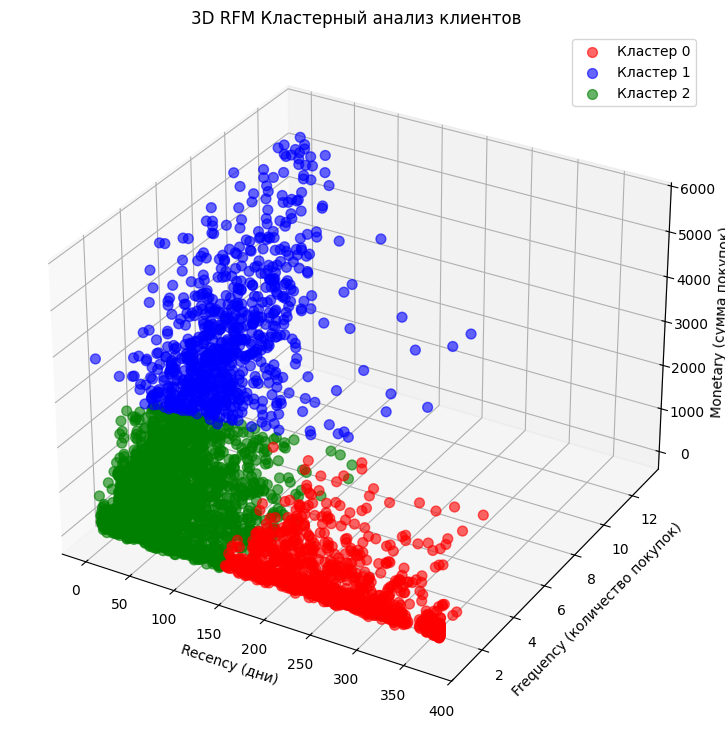

In [52]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Создание 3D-диаграммы
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Определение цветов для кластеров
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
cluster_labels = np.unique(data_with_clusters['Cluster'])

# Отображение точек для каждого кластера
for i, cluster in enumerate(cluster_labels):
    cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster]
    ax.scatter(cluster_data['Recency'], 
              cluster_data['Frequency'], 
              cluster_data['MonetaryValue'],
              c=colors[i], 
              label=f'Кластер {cluster}',
              alpha=0.6,
              s=50)

# Настройка осей и меток
ax.set_xlabel('Recency (дни)')
ax.set_ylabel('Frequency (количество покупок)')
ax.set_zlabel('Monetary (сумма покупок)')
ax.set_title('3D RFM Кластерный анализ клиентов')
ax.legend()

plt.show()

In [54]:
data_with_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4044 entries, 12346 to 18287
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        4044 non-null   int64  
 1   Frequency      4044 non-null   int64  
 2   MonetaryValue  4044 non-null   float64
 3   Cluster        4044 non-null   int32  
 4   PC1            4044 non-null   float64
 5   PC2            4044 non-null   float64
dtypes: float64(3), int32(1), int64(2)
memory usage: 334.4+ KB


#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

Средние значения по кластерам:
            Recency  Frequency  MonetaryValue
Cluster                                      
0        253.474474   1.403403     386.277297
1         31.943299   7.068299    2657.746997
2         51.221684   2.329220     660.068947

Нормализованные значения:
          Recency  Frequency  MonetaryValue
Cluster                                    
0        1.000000    0.00000       0.000000
1        0.000000    1.00000       1.000000
2        0.087023    0.16343       0.120535


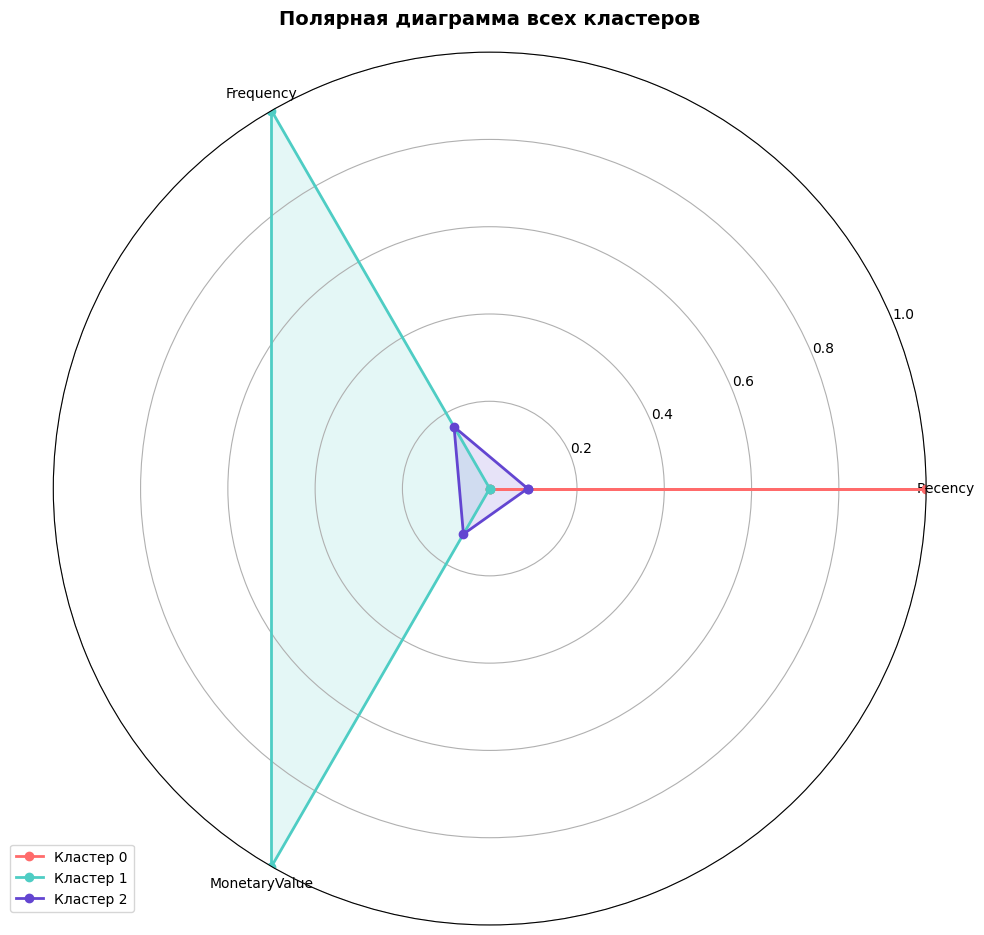

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Проверка наличия необходимых кластеров
unique_clusters = sorted(data_with_clusters['Cluster'].unique())
if len(unique_clusters) != 3:
    raise ValueError(f"Недостаточно кластеров для анализа ({len(unique_clusters)} вместо ожидаемых 3)")

# Группируем по кластерам и рассчитываем средние значения
cluster_means = data_with_clusters.groupby('Cluster')[['Recency', 'Frequency', 'MonetaryValue']].mean()
print("Средние значения по кластерам:")
print(cluster_means)

# Функция для нормализации столбца
def normalize_column(column):
    min_val = column.min()
    max_val = column.max()
    if max_val == min_val:
        return 0  # Если диапазон равен нулю, возвращаем 0
    else:
        return (column - min_val) / (max_val - min_val)

# Применяем нормализацию
normalized_data = cluster_means.apply(normalize_column)

print("\nНормализованные значения:")
print(normalized_data)


# Настройка стиля графиков
plt.style.use('default')
plt.rcParams['font.size'] = 10

# Параметры для полярной диаграммы
CATEGORIES = ['Recency', 'Frequency', 'MonetaryValue']
N = len(CATEGORIES)

# Углы для каждого признака
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Замыкаем круг

# Цвета для каждого кластера
colors = ['#FF6B6B', '#4ECDC4', "#6345D1", '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8']

# Создаем одну полярную диаграмму со всеми кластерами
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

for i, (cluster_id, row) in enumerate(normalized_data.iterrows()):
    # Значения для текущего кластера
    values = row[CATEGORIES].values.flatten().tolist()
    values += values[:1]  # Замыкаем круг
    
    # Строим полярную диаграмму
    ax.plot(angles, values, 'o-', linewidth=2, 
            label=f'Кластер {cluster_id}', color=colors[i % len(colors)])
    ax.fill(angles, values, alpha=0.15, color=colors[i % len(colors)])

# Настройка осей
ax.set_xticks(angles[:-1])
ax.set_xticklabels(CATEGORIES)
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'])
ax.grid(True)

# Заголовок и легенда
ax.set_title('Полярная диаграмма всех кластеров', size=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.tight_layout()
plt.show()

## 5. Выводы и оформление работы

Напишите заключение о проделанной работе и полученных результатах. Отметьте, какие сегменты клиентов вам удалось найти в данных.

После завершения проекта создайте в своём репозитории файл README.md и кратко опишите содержимое проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги репозитория (теги придумайте самостоятельно в зависимости от того, какую задачу вы решали).

Анализ выявил три очевидные категории клиентов: первая группа включает новых покупателей, которые проявляют низкую активность; вторая состоит из активных пользователей, обеспечивающих высокую прибыль сайту; третья представляет собой промежуточную категорию, демонстрирующую тенденцию перехода от пассивной аудитории к активной при благоприятных условиях бизнеса и наоборот. Важно отметить, что нами были определены конкретные характеристики третьей группы, позволяющие при грамотном маркетинге управлять процессом перемещения потребителей между категориями посредством мониторинга давности заказов и их количества. 